In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from os.path import join, expanduser, basename
from invert import invert_sd, epsilon_density
from scipy.stats import pearsonr
import os

In [15]:
with open(expanduser(f'~/uavsar/results/uavsar_snotel_sd/res_df_v2'), 'rb') as f:
    res = pickle.load(f)
res_vv = res[res.pol == 'VV']
snow_off_df = res.dropna(subset = ['snow_off_phase'])
fig_dir = expanduser('~/uavsar/figures/snotel_uavsar_compare/')

In [90]:
snow_off_df.iloc[0]['ulmo_result']['312_ID_SNTL'].keys()

dict_keys(['SNOTEL:WTEQ_H', 'SNOTEL:SNWD_H', 'SNOTEL:TOBS_H', 'phase', 'inc', 'cor'])

In [101]:
snow_off_df.iloc[1]['name']

'stlake_09127_21008-001_21010-000_0006d_s01_L090VV_01.unw.grd.tiff'

0.18629747203320118

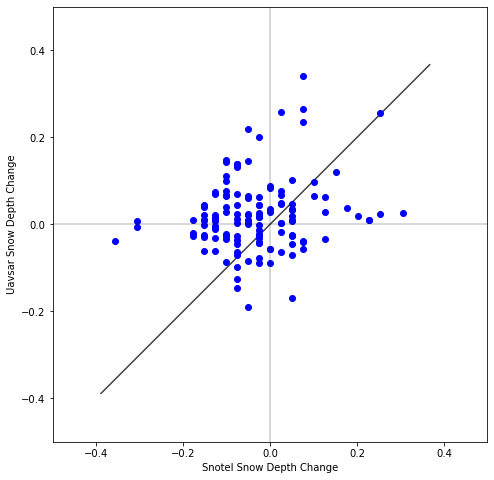

In [114]:
f, ax = plt.subplots(figsize = (12,8))
xs = []
ys = []
for i,r in snow_off_df.iterrows():
    if r.ulmo_result:
        if r.pol == 'VV':
            for stat in r.ulmo_result:
                obs = r.ulmo_result[stat]
                sds = obs['SNOTEL:SNWD_H']
                # temps = obs['SNOTEL:TOBS_H']
                swes = obs['SNOTEL:WTEQ_H']
                swe_delta = swes[-1] - swes[0]
                # if swe_delta > 0:
                sd_delta = sds[-1] - sds[0]
                phase = obs['phase'] - r['snow_off_phase']
                density = np.nanmean(swes) / np.nanmean(sds)
                sd_us = invert_sd(phase, obs['inc'], epsilon = epsilon_density(density))
                sd_us_mean = np.nanmean(sd_us)
                swe_us_mean = density * sd_us_mean

                cor_mean = np.nanmean(obs['cor'])
                plt.scatter(sd_delta, sd_us_mean, alpha = 1, color = 'blue')
                xs.append(sd_delta)
                ys.append(sd_us_mean)
# plt.xlim(-0.5, 0.5)
# plt.ylim(-1, 1)
plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel Snow Depth Change')
plt.ylabel('Uavsar Snow Depth Change')

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim((-0.5,0.5))
ax.set_ylim((-0.5,0.5))

plt.savefig(join(fig_dir, 'snow_off_modis_uavsar_snotel_sd_diff.png'))

ys = np.array(ys)
xs = np.array(xs)
xs = xs[~np.isnan(ys)]
ys = ys[~np.isnan(ys)]
pearsonr(xs, ys)[0]

/tmp/ipykernel_19054/3965305775.py:14: RuntimeWarning: Mean of empty slice
  sd_us_mean = np.nanmean(sd_us)


-0.07000643934746904

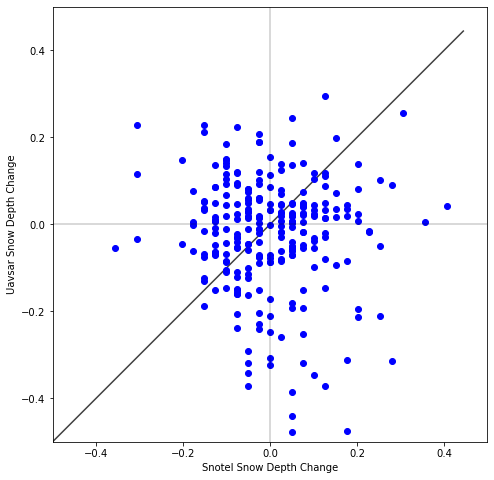

In [108]:
f, ax = plt.subplots(figsize = (12,8))
xs = []
ys = []
for i,r in res.iterrows():
    if r.ulmo_result:
        if r.pol == 'VV':
            for stat in r.ulmo_result:
                obs = r.ulmo_result[stat]
                sds = obs['SNOTEL:SNWD_H']
                
                sd_delta = sds[-1] - sds[0]
                
                sd_us = invert_sd(obs['phase'], obs['inc'], epsilon = epsilon_density(0.2))
                sd_us_mean = np.nanmean(sd_us)

                cor_mean = np.nanmean(obs['cor'])
                plt.scatter(sd_delta, sd_us_mean, alpha = 1, color = 'blue')
                xs.append(sd_delta)
                ys.append(sd_us_mean)
# plt.xlim(-0.5, 0.5)
# plt.ylim(-1, 1)
plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel Snow Depth Change')
plt.ylabel('Uavsar Snow Depth Change')

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim((-0.5,0.5))
ax.set_ylim((-0.5,0.5))

plt.savefig(join(fig_dir, 'uavsar_snotel_sd_diff.png'))

ys = np.array(ys)
xs = np.array(xs)
xs = xs[~np.isnan(ys)]
ys = ys[~np.isnan(ys)]
pearsonr(xs, ys)[0]

/tmp/ipykernel_17842/2440878372.py:11: RuntimeWarning: Mean of empty slice
  sd_us_mean = np.nanmean(sd_us)*0.2


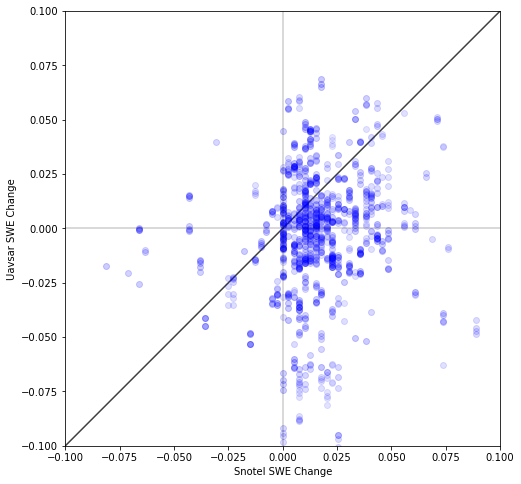

In [40]:
f, ax = plt.subplots(figsize = (12,8))
for i,r in res.iterrows():
    if r.ulmo_result:
        for stat in r.ulmo_result:
            obs = r.ulmo_result[stat]
            sds = obs['SNOTEL:WTEQ_H']
            
            sd_delta = sds[-1] - sds[0]
            
            sd_us = invert_sd(obs['phase'], obs['inc'], epsilon = epsilon_density(0.2))
            sd_us_mean = np.nanmean(sd_us)*0.2

            cor_mean = np.nanmean(obs['cor'])
            plt.scatter(sd_delta, sd_us_mean, alpha = cor_mean/3, color = 'blue')
# plt.xlim(-0.5, 0.5)
# plt.ylim(-1, 1)
plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel SWE Change')
plt.ylabel('Uavsar SWE Change')

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim((-0.1,0.1))
ax.set_ylim((-0.1,0.1))

plt.savefig(join(fig_dir, 'uavsar_snotel_swe_diff.png'))

In [ ]:
f, ax = plt.subplots(figsize = (12,8))
for i,r in res.iterrows():
    if r.ulmo_result:
        for stat in r.ulmo_result:
            obs = r.ulmo_result[stat]
            sds = obs['SNOTEL:SNWD_H']
            
            sd_delta = sds[-1] - sds[0]
            
            sd_us = invert_sd(obs['phase'], obs['inc'], epsilon = epsilon_density(0.2))
            sd_us_mean = np.nanmean(sd_us)

            cor_mean = np.nanmean(obs['cor'])
            plt.scatter(sd_delta, sd_us_mean, alpha = cor_mean/3, color = 'blue')
# plt.xlim(-0.5, 0.5)
# plt.ylim(-1, 1)
plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel Snow Depth Change')
plt.ylabel('Uavsar Snow Depth Change')

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim((-0.5,0.5))
ax.set_ylim((-0.5,0.5))

plt.savefig(join(fig_dir, 'uavsar_snotel_sd_diff.png'))

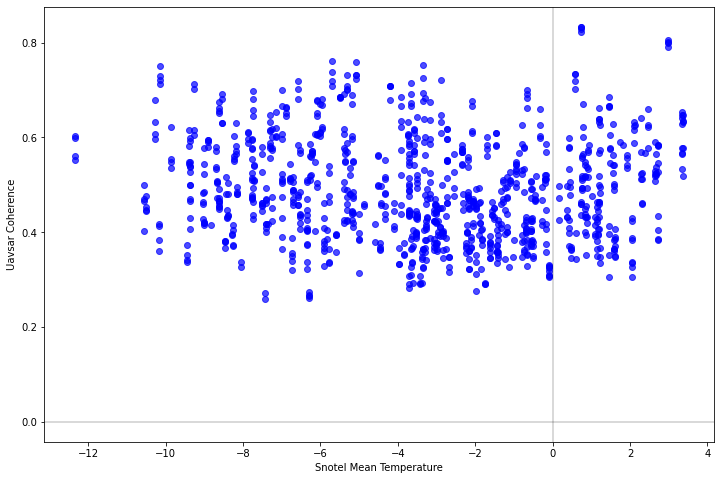

In [26]:
f, ax = plt.subplots(figsize = (12,8))
for i,r in res.iterrows():
    if r.ulmo_result:
        for stat in r.ulmo_result:
            obs = r.ulmo_result[stat]
            temps = obs['SNOTEL:TOBS_H']
            mean_temp = np.nanmean(temps)
            sds = obs['SNOTEL:SNWD_H']


            cor_mean = np.nanmean(obs['cor'])
            if np.nanmin(sds) > 0.1:
                plt.scatter(mean_temp, cor_mean, alpha = 0.7, color = 'blue')
# plt.xlim(-0.5, 0.5)
# plt.ylim(-1, 1)
plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel Mean Temperature')
plt.ylabel('Uavsar Coherence')
plt.savefig(join(fig_dir, 'coh_snotel_mean_temp.png'))

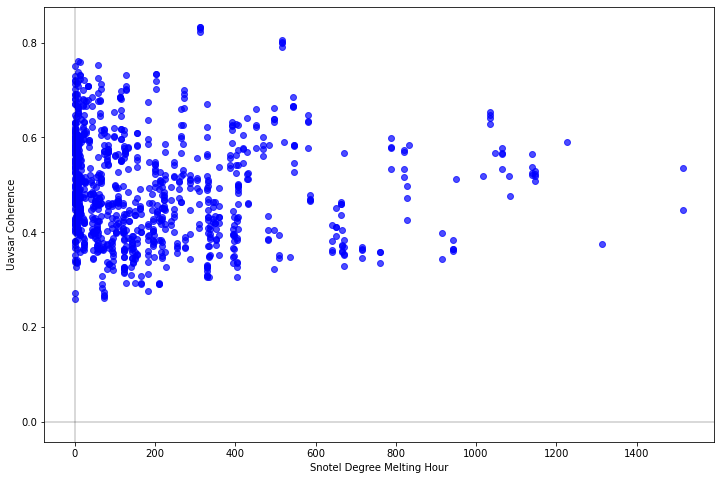

In [27]:
f, ax = plt.subplots(figsize = (12,8))
for i,r in res.iterrows():
    if r.ulmo_result:
        for stat in r.ulmo_result:
            obs = r.ulmo_result[stat]
            temps = obs['SNOTEL:TOBS_H']
            dmh = np.nansum(temps[temps > 0])
            sds = obs['SNOTEL:SNWD_H']

            cor_mean = np.nanmean(obs['cor'])
            if np.nanmin(sds) >0:
                plt.scatter(dmh, cor_mean, alpha = 0.7, color = 'blue')
# plt.xlim(-0.5, 0.5)
# plt.ylim(-1, 1)
plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel Degree Melting Hour')
plt.ylabel('Uavsar Coherence')
plt.savefig(join(fig_dir, 'coh_snotel_melt_degree_hour.png'))

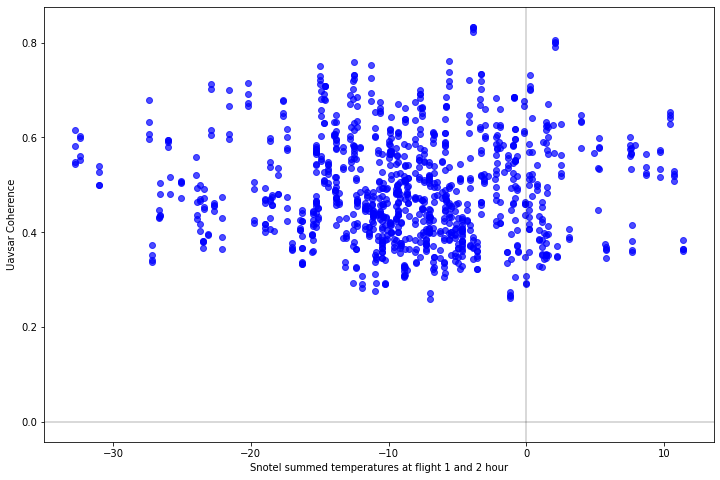

In [28]:
f, ax = plt.subplots(figsize = (12,8))
for i,r in res.iterrows():
    if r.ulmo_result:
        for stat in r.ulmo_result:
            obs = r.ulmo_result[stat]
            temps = obs['SNOTEL:TOBS_H']
            sum_flight_temps = temps[0] + temps[-1]
            sds = obs['SNOTEL:SNWD_H']

            cor_mean = np.nanmean(obs['cor'])
            if np.nanmin(sds) >0:
                plt.scatter(sum_flight_temps, cor_mean, alpha = 0.7, color = 'blue')
# plt.xlim(-0.5, 0.5)
# plt.ylim(-1, 1)
plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel summed temperatures at flight 1 and 2 hour')
plt.ylabel('Uavsar Coherence')
plt.savefig(join(fig_dir, 'coh_snotel_summed_flight_temps.png'))

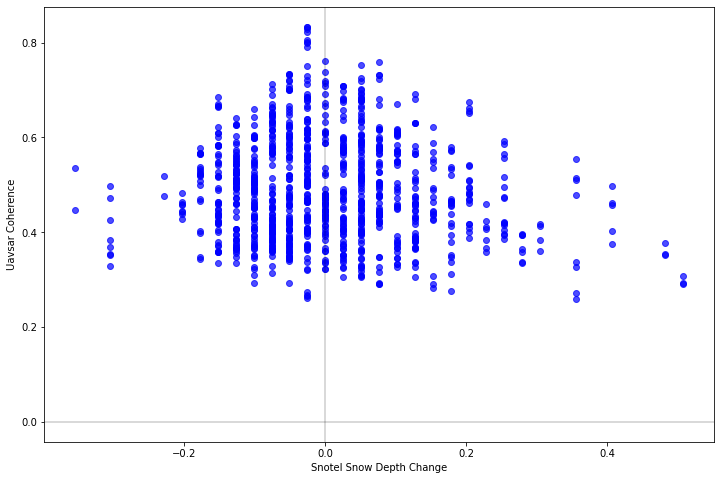

In [29]:
f, ax = plt.subplots(figsize = (12,8))
for i,r in res.iterrows():
    if r.ulmo_result:
        for stat in r.ulmo_result:
            obs = r.ulmo_result[stat]
            temps = obs['SNOTEL:TOBS_H']
            mean_temp = np.nanmean(temps)
            sds = obs['SNOTEL:SNWD_H']
            sd_delta = sds[-1] - sds[0]

            cor_mean = np.nanmean(obs['cor'])
            if np.nanmin(sds) >0:
                plt.scatter(sd_delta, cor_mean, alpha = 0.7, color = 'blue')
# plt.xlim(-0.5, 0.5)
# plt.ylim(-1, 1)
plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel Snow Depth Change')
plt.ylabel('Uavsar Coherence')
plt.savefig(join(fig_dir, 'coh_snotel_sd_delta.png'))

In [47]:
lm_df = pd.DataFrame()
for i,r in res.iterrows():
    if r.ulmo_result:
        for stat in r.ulmo_result:
            d = {}
            obs = r.ulmo_result[stat]
            temps = obs['SNOTEL:TOBS_H']
            d['mean_temp'] = np.nanmean(temps)    
            d['sum_flight_temps'] = temps[0] + temps[-1]
            d['dmh'] = np.nansum(temps[temps > 0]) 
            sds = obs['SNOTEL:SNWD_H']
            d['mean_sd'] = np.nanmean(sds) 
            d['snotel_delta_sd'] = sds[-1] - sds[0]  
            swes = obs['SNOTEL:WTEQ_H']
            d['mean_swe'] = np.nanmean(swes)
            d['snotel_delta_swe'] = swes[-1] - swes[0] 
            sd_us = invert_sd(obs['phase'], obs['inc'], epsilon = epsilon_density(0.2))
            d['uavsar_delta_sd'] = np.nanmean(sd_us)

            d['cor_mean'] = np.nanmean(obs['cor'])
            pd.DataFrame.from_dict([d])
            lm_df = pd.concat([lm_df, pd.DataFrame.from_dict([d])])

/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: Mean of empty slice
  d['uavsar_delta_sd'] = np.nanmean(sd_us)
/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: Mean of empty slice
  d['uavsar_delta_sd'] = np.nanmean(sd_us)
/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: Mean of empty slice
  d['uavsar_delta_sd'] = np.nanmean(sd_us)
/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: Mean of empty slice
  d['uavsar_delta_sd'] = np.nanmean(sd_us)
/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: Mean of empty slice
  d['uavsar_delta_sd'] = np.nanmean(sd_us)
/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: Mean of empty slice
  d['uavsar_delta_sd'] = np.nanmean(sd_us)
/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: Mean of empty slice
  d['uavsar_delta_sd'] = np.nanmean(sd_us)
/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: Mean of empty slice
  d['uavsar_delta_sd'] = np.nanmean(sd_us)
/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: M

In [116]:
from sklearn.model_selection import train_test_split
X = lm_df[['mean_temp','mean_sd','snotel_delta_sd','mean_swe','snotel_delta_swe']]
y = lm_df.cor_mean
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


m = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
m.fit(X, y)
print(f'Train accuray {m.score(X,y)}')

print(f'Test accuray {m.score(X_test,y_test)}')

Train accuray 0.1661781065537994
Test accuray 0.21168630741290817


In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = train[['mean_temp','mean_sd','snotel_delta_sd','mean_swe','snotel_delta_swe']]
y = train.cor_mean > 0.5

m = make_pipeline(StandardScaler(with_mean=False), RandomForestRegressor(max_depth=2))
m.fit(X, y)
print(f'Train accuray {m.score(X,y)}')
X_test = test[['mean_temp','mean_sd','snotel_delta_sd','mean_swe','snotel_delta_swe']]
y_test = test.cor_mean > 0.5
print(f'Test accuray {m.score(X_test,y_test)}')

Train accuray 0.17783626850833179
Test accuray 0.1636810928654946


In [119]:
m[:-1].get_feature_names_out()

array(['mean_temp', 'mean_sd', 'snotel_delta_sd', 'mean_swe',
       'snotel_delta_swe'], dtype=object)

In [120]:
from sklearn.inspection import permutation_importance

start_time = time.time()
forest = m['randomforestregressor']
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=m[:-1].get_feature_names_out())

/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without featur

Elapsed time to compute the importances: 2.640 seconds


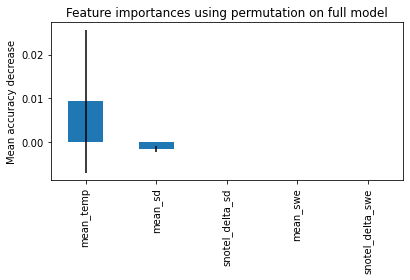

In [121]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# Classifier

In [95]:
from sklearn.model_selection import train_test_split
X = lm_df[['mean_temp','mean_sd','snotel_delta_sd','mean_swe','snotel_delta_swe']]
feature_names = ['mean_temp','mean_sd','snotel_delta_sd','mean_swe','snotel_delta_swe']
y = lm_df.cor_mean > 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


m = make_pipeline(StandardScaler(with_mean=False), RandomForestClassifier(max_depth=2))
m.fit(X, y)
print(f'Train accuray {m.score(X,y)}')

print(f'Test accuray {m.score(X_test,y_test)}')

Train accuray 0.7270973963355835
Test accuray 0.7192307692307692


In [98]:
import time
import numpy as np

start_time = time.time()
forest = m['randomforestclassifier']
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.008 seconds


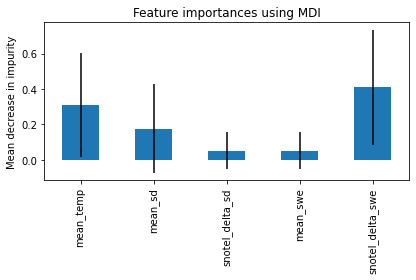

In [99]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [103]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=m.feature_names_in_)

/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without f

Elapsed time to compute the importances: 0.281 seconds


/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without f

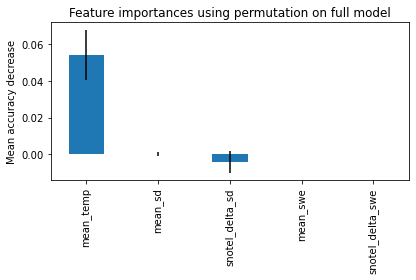

In [104]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()